In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

ACTIONS = {"L": -1, "R": +1}

class QLearning:
    def __init__(self, states: list[int], terminal_state: int, alpha: float, gamma: float, episodes: int, start_state: int, epsilon: float, reward: float):
        self.states = states
        self.terminal_state = terminal_state
        self.alpha = alpha
        self.gamma = gamma
        self.episodes = episodes
        self.start_state = start_state
        self.epsilon = epsilon
        self.reward = reward
        self.Q = {(s, a): 0.0 for s in states for a in ACTIONS}

    def is_terminal(self, s):
        return s == self.terminal_state

    def step(self, s, a):
        if self.is_terminal(s):
            return s, 0.0, True
        move = ACTIONS[a]
        s_next = min(max(s + move, min(self.states)), max(self.states))  
        r = self.reward if s_next == self.terminal_state else 0.0
        done = (s_next == self.terminal_state)
        return s_next, r, done

    def greedy_action(self, s):
        if self.is_terminal(s):
            return None

        # ε-greedy rule
        if np.random.rand() < self.epsilon:
            # exploration
            return np.random.choice(list(ACTIONS.keys()))
        else:
            # exploitation
            q_values = {a: self.Q[(s, a)] for a in ACTIONS}
            max_q = max(q_values.values())
            best_actions = [a for a, q in q_values.items() if q == max_q]
            return np.random.choice(best_actions)

    def rollout_greedy_path(self, max_steps=50):
        s = self.start_state
        path = [s]
        steps = 0
        while not self.is_terminal(s) and steps < max_steps:
            # pick the greedy action from current Q-values
            a = self.greedy_action(s)
            if a is None:
                break
            s_next, _, _ = self.step(s, a)
            path.append(s_next)
            s = s_next
            steps += 1
        return path


    def q_update(self, s, a, r, s_next):
        max_next = 0.0 if self.is_terminal(s_next) else max(self.Q[(s_next, "L")], self.Q[(s_next, "R")])
        target = r + self.gamma * max_next
        self.Q[(s, a)] = self.Q[(s, a)] + self.alpha * (target - self.Q[(s, a)]) # update Q-value
        return target

    def run_training(self):
        records = []

        for ep in range(1, self.episodes+1):
            s = self.start_state
            steps = 0
            # run until terminal
            while not self.is_terminal(s) and steps < 50:
                a = self.greedy_action(s)
                s_next, r, done = self.step(s, a)
                self.q_update(s, a, r, s_next)
                s = s_next
                steps += 1

            # record requested Q entries after this episode

            rec = {
                "Episode": ep,
                **{f"Q({s},{a})": self.Q[(s, a)] for s in self.states for a in ACTIONS}
            }
            records.append(rec)

        df = pd.DataFrame(records).set_index("Episode")

        # display_dataframe_to_user("Greedy (ε=0) Q-table after each episode", df)
        print(df)

        # plot the evolving values for the two actions that actually change
        plt.figure()
        for s,a in itertools.product(self.states, ACTIONS):
            plt.plot(df.index, df[f"Q({s},{a})"], label=f"Q({s},{a})")

        # plt.plot(df.index, df["Q(0,R)"], label="Q(0,R)")
        # plt.plot(df.index, df["Q(0,L)"], label="Q(0,L)", color="red", linestyle="--")
        # plt.plot(df.index, df["Q(1,R)"], label="Q(1,R)")
        # plt.plot(df.index, df["Q(1,L)"], label="Q(1,L)", color="blue", linestyle="--")
        # plt.plot(df.index, df["Q(2,R)"], label="Q(2,R)")
        # plt.plot(df.index, df["Q(2,L)"], label="Q(2,L)", color="purple", linestyle="--")
        # plt.plot(df.index, df["Q(3,R)"], label="Q(3,R)")
        # plt.plot(df.index, df["Q(3,L)"], label="Q(3,L)", color="grey", linestyle="--")
        # plt.plot(df.index, df["Q(4,R)"], label="Q(4,R)")

        plt.xlabel("Episode")
        plt.ylabel("Q-value")
        plt.title(f"Greedy (ε={self.epsilon}) learning from start={self.start_state}, terminal={self.terminal_state}")
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Return final row for convenience
        return df.tail(1)



         Q(0,L)  Q(0,R)  Q(1,L)    Q(1,R)  Q(2,L)    Q(2,R)  Q(3,L)    Q(3,R)  \
Episode                                                                         
1           0.0     0.0     0.0  0.000000     0.0  0.000000     0.0  0.000000   
2           0.0     0.0     0.0  0.000000     0.0  0.000000     0.0  0.441000   
3           0.0     0.0     0.0  0.000000     0.0  0.277830     0.0  0.705600   
4           0.0     0.0     0.0  0.175033     0.0  0.527877     0.0  0.824670   
5           0.0     0.0     0.0  0.385072     0.0  0.677905     0.0  0.872298   
6           0.0     0.0     0.0  0.542602     0.0  0.752919     0.0  0.890158   
7           0.0     0.0     0.0  0.637120     0.0  0.786676     0.0  0.896588   
8           0.0     0.0     0.0  0.686742     0.0  0.800853     0.0  0.898839   
9           0.0     0.0     0.0  0.710560     0.0  0.806524     0.0  0.899610   
10          0.0     0.0     0.0  0.721278     0.0  0.808712     0.0  0.899871   
11          0.0     0.0     

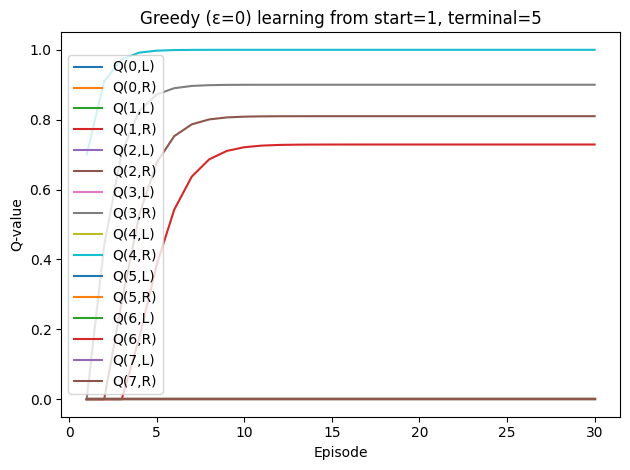

[1, 2, 3, 4, 5]


In [ ]:
if __name__ == "__main__":
    np.random.seed(42)  # for reproducibility
    states = list(range(0,8))
    terminal_state = 5
    start_state = 1

    alpha = 0.7
    gamma = 0.9
    epsilon = 0
    episodes = 30
    reward = 1

    ql = QLearning(states, terminal_state, alpha, gamma, episodes, start_state, epsilon, reward)
    ql.run_training()
    path = ql.rollout_greedy_path()
    print(path)